Read necessary libraries 

In [41]:
from matplotlib import pyplot as plt, rcParams, animation
import scipy, seaborn as sns, matplotlib
from scipy.cluster import hierarchy as hc
matplotlib.rc('animation', html='html5')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
np.set_printoptions(precision=5, linewidth=110, suppress=True)
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import ben

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
path = 'data/thesis/'

----

The purpose of the paper is to compare the effectiveness of the two prominent investing approaches: passive and active. The former is broadly reflected through a portfolio comprising of various industry ETFs to diversify risk. Meanwhile, the latter is generally embodied in factor investing which tries to explore any inefficiencies of the market to gain a better performance. The study adopts the mean-variance efficiency test, proposed by Basack, Jagannatha, and Sun 2002 (hereafter BJS (2002)) which measures the difference between variance of a mimicking portfolio and a benchmark with identical returns.

### I. Data

1. 12 industry ETFs, each industry ETF is a column in a dataframe called "ind", these ETFs are designed by BlackRock
2. 07 factor ETFs representing factor investing, each strategy is a column in a dataframe called "factor", these ETFs are designed by BlackRock
3. S&P500 as market index and risk free rate (T-Bill one-month return) as rf

In [43]:
ind = ben.get_df('sector_return.xlsx', path); ind.head(2)

,IDU,IYC,IYF,IYG,IYH,IYJ,IYK,IYM,IYR,IYT,IYW,IYZ
Date,,,,,,,,,,,,
2013-08,-0.053026,-0.037844,-0.049613,-0.051423,-0.035187,-0.022068,-0.033417,-0.001690,-0.065325,-0.032828,-0.006214,-0.040458
2013-09,0.005246,0.054969,0.028347,0.024893,0.028868,0.052925,0.021505,0.043441,0.024904,0.053466,0.026443,0.029104


In [44]:
ind.shape

(89, 12)

In [45]:
factor = ben.get_df('factor_return.xlsx', path); factor.head(2)

,EEMV,EFAV,MTUM,QUAL,SIZE,USMV,VLUE
Date,,,,,,,
2013-08,-0.040745,-0.017007,-0.035704,-0.020750,-0.033024,-0.032573,-0.031201
2013-09,0.065892,0.054481,0.030237,0.038127,0.031530,0.025530,0.028047


In [46]:
factor.shape

(89, 7)

In [47]:
market_rf = ben.get_df_excel('sp500.xlsx', path); market_rf.head(2)

,Risk free,Market return
Date,,
2013-08,0.000009,-0.031298
2013-09,0.000008,0.029749


In [48]:
market_rf.shape

(89, 2)

In [49]:
mar_ret = market_rf['Market return'].mean()
mar_vol = market_rf['Market return'].std()
market = (mar_ret, mar_vol)
market

(0.009845607748314607, 0.04023132413238701)

In [50]:
rf = market_rf['Risk free'].mean()
rf

0.0005907303370786517

### II. Optimizing portfolio with the two approaches

#### Efficient frontier comprising of industry indexes

In [51]:
ind_er = ind.mean()
ind_cov = ind.cov()

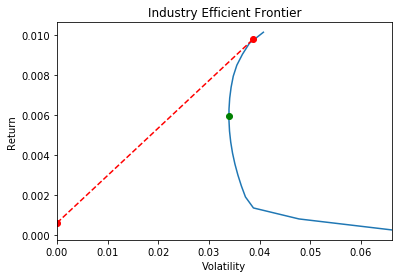

In [52]:
ben.plot_ef(ind_er, ind_cov, title='Industry Efficient Frontier',
            riskfree_rate=rf, show_cml=True, show_gmv=True)

In [53]:
ind_gmv = ben.port_gmv(ind_er, ind_cov) # global min. var. portfolio return and vol.
ind_gmv

(0.005970768463534384, 0.033953219749743344)

In [54]:
ind_tangency = ben.port_tangency(rf, ind_er, ind_cov) # Tangency portfolio return and vol.
ind_tangency

(0.009780220582153692, 0.03869415408690239)

#### Efficient frontier comprising of factors

In [55]:
factor_er = factor.mean()
factor_cov = factor.cov()

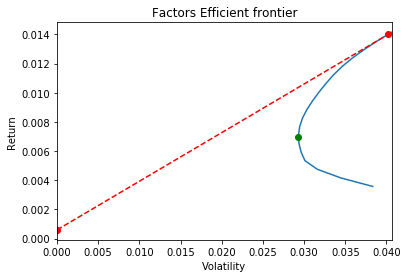

In [56]:
ben.plot_ef(factor_er, factor_cov, title='Factors Efficient frontier',
                       riskfree_rate=rf, show_cml=True, show_gmv=True)

In [57]:
factor_gmv = ben.port_gmv(factor_er, factor_cov) # global min. var. portfolio return and vol.
factor_gmv

(0.006974897020265774, 0.029321298642050703)

In [58]:
factor_tangency = ben.port_tangency(rf, factor_er, factor_cov) #Tangency port. return and vol.
factor_tangency

(0.0140006627475656, 0.04018024505697719)

#### Factors as benchmark in the industry efficient frontier

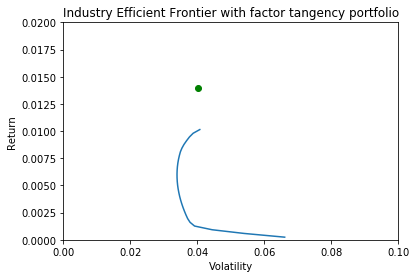

In [59]:
ben.plot_ef_with_bm(ind_er, ind_cov, factor_tangency, n_points=30,
                    title='Industry Efficient Frontier with factor tangency portfolio',
                    riskfree_rate=rf, show_bm=True)

#### ==> The efficient frontier can not attain the same level of return as the benchmark

----

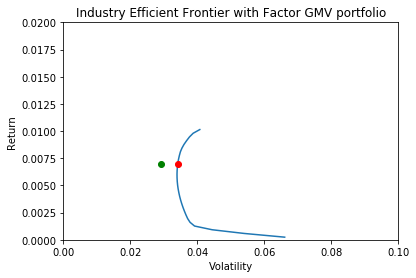

In [60]:
ben.plot_ef_with_bm(ind_er, ind_cov, factor_gmv, n_points=30, 
                    title='Industry Efficient Frontier with Factor GMV portfolio',
                    riskfree_rate=rf, show_bm=True, show_ef_point=True)

In [61]:
p_ind_gmv = ben.spotting_p(factor_gmv, ind_er, ind_cov)
p_ind_gmv

,Weight,Return,Vol
0,1.725909e-01,0.006975,0.034171
1,1.951564e-17,0.006975,0.034171
2,1.230569e-17,0.006975,0.034171
3,0.000000e+00,0.006975,0.034171
4,4.345866e-01,0.006975,0.034171
5,0.000000e+00,0.006975,0.034171
6,2.854774e-01,0.006975,0.034171
7,0.000000e+00,0.006975,0.034171
8,0.000000e+00,0.006975,0.034171
9,4.336809e-18,0.006975,0.034171


In [62]:
factor_gmv

(0.006974897020265774, 0.029321298642050703)

----

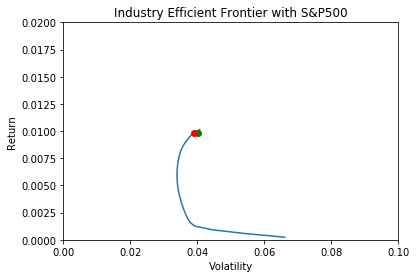

In [63]:
# with weights range from 0 to 1
ben.plot_ef_with_bm(ind_er, ind_cov, market, n_points=30, 
                    title='Industry Efficient Frontier with S&P500',
                    riskfree_rate=rf, show_bm=True, show_ef_point=True)

In [64]:
p_ind_sp500 = ben.spotting_p(market, ind_er, ind_cov)
p_ind_sp500

,Weight,Return,Vol
0,9.697809e-18,0.009846,0.038984
1,0.000000e+00,0.009846,0.038984
2,3.581175e-18,0.009846,0.038984
3,0.000000e+00,0.009846,0.038984
4,8.309356e-01,0.009846,0.038984
5,6.253531e-18,0.009846,0.038984
6,1.308725e-01,0.009846,0.038984
7,0.000000e+00,0.009846,0.038984
8,2.105391e-18,0.009846,0.038984
9,5.108008e-18,0.009846,0.038984


In [65]:
market

(0.009845607748314607, 0.04023132413238701)

The S&P500 lies almost in the efficient frontier of industry ETFs

----

#### Industry as benchmark in the factor efficient frontier


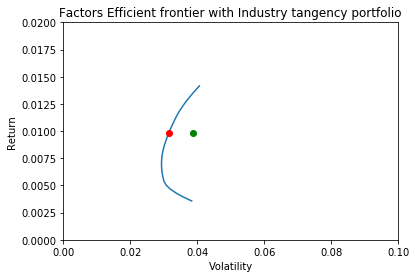

In [66]:
# weights range from 0 to 1
ben.plot_ef_with_bm(factor_er, factor_cov, ind_tangency,
                    title='Factors Efficient frontier with Industry tangency portfolio',
                    n_points=30, riskfree_rate=rf, show_bm=True, show_ef_point=True)

In [67]:
p_factor_tan = ben.spotting_p(ind_tangency, factor_er, factor_cov)
p_factor_tan

,Weight,Return,Vol
0,0.000000e+00,0.00978,0.031456
1,1.595335e-01,0.00978,0.031456
2,9.349669e-02,0.00978,0.031456
3,0.000000e+00,0.00978,0.031456
4,0.000000e+00,0.00978,0.031456
5,7.469698e-01,0.00978,0.031456
6,3.636291e-17,0.00978,0.031456


In [68]:
ind_tangency

(0.009780220582153692, 0.03869415408690239)

----

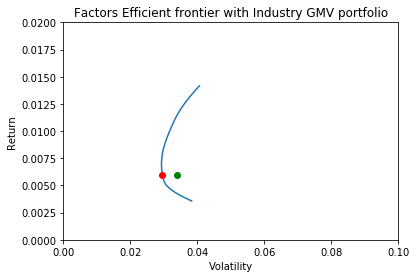

In [69]:
# weights range from 0 to 1
ben.plot_ef_with_bm(factor_er, factor_cov, ind_gmv,
                    title='Factors Efficient frontier with Industry GMV portfolio',
                    n_points=30, riskfree_rate=rf, show_bm=True, show_ef_point=True)

In [70]:
p_factor_gmv = ben.spotting_p(ind_gmv, factor_er, factor_cov)
p_factor_gmv

,Weight,Return,Vol
0,4.163336e-17,0.005971,0.029617
1,8.904535e-01,0.005971,0.029617
2,0.000000e+00,0.005971,0.029617
3,0.000000e+00,0.005971,0.029617
4,6.938894e-18,0.005971,0.029617
5,1.095465e-01,0.005971,0.029617
6,6.938894e-18,0.005971,0.029617


In [71]:
ind_gmv

(0.005970768463534384, 0.033953219749743344)

----

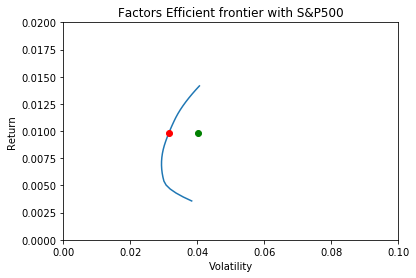

In [72]:
# weights range from 0 to 1
ben.plot_ef_with_bm(factor_er, factor_cov, market,
                    title='Factors Efficient frontier with S&P500',
                    n_points=30, riskfree_rate=rf, show_bm=True, show_ef_point=True)

In [73]:
p_factor_sp500 = ben.spotting_p(market, factor_er, factor_cov)
p_factor_sp500

,Weight,Return,Vol
0,0.000000e+00,0.009846,0.031542
1,1.516453e-01,0.009846,0.031542
2,1.005783e-01,0.009846,0.031542
3,0.000000e+00,0.009846,0.031542
4,0.000000e+00,0.009846,0.031542
5,7.477764e-01,0.009846,0.031542
6,1.804026e-17,0.009846,0.031542


In [74]:
market

(0.009845607748314607, 0.04023132413238701)

---

-----

### III. The BJS (2002) test with the null hypothesis $\lambda$ = 0

In [75]:
def calculating_bjs (portfolio_p, primitive_asset, benchmark):
    w_p = portfolio_p['Weight'].values
    r_p = primitive_asset @ w_p
    std_p = r_p.std()
    
    # calculating lambda
    lamda = std_p - benchmark[1] 
    
    # now perform the BJS 2002 test
    l = []
    for t in range(1,primitive_asset.shape[0]):
        f = primitive_asset.iloc[:t, :].values
        r = f @ w_p.T
        s = r.std()
        l.append(s - benchmark[1])
    l = np.array(l)
    l_std = l.std()
    
    # calculating z score
    z = lamda * np.sqrt(primitive_asset.shape[0]) / l_std
    
    return z

#### ==> rejecting the null with one, two, and three stars with respect to p_value of 10%, 5% and 1% (z = -2.58, -1.96, and -1.65)

Comparing factor ETFs with industry benchmark and S&P500 portfolios

In [76]:
calculating_bjs(p_factor_tan, factor, ind_tangency) # reject the null with three stars

-18.940505571073437

In [77]:
calculating_bjs(p_factor_gmv, factor, ind_gmv) # reject the null with three stars

-12.530703227176256

In [78]:
calculating_bjs(p_factor_sp500, factor, market) # reject the null with three stars

-22.671685236590058

Now let's treat industry ETFs as primitive assets

Can not attain when comparing with factor tangency portfolio

In [79]:
calculating_bjs(p_ind_gmv, ind, factor_gmv) # reject the null with three stars

11.795411049532376

In [80]:
calculating_bjs(p_ind_sp500, ind, market) # do not reject the null at 10%

-2.3123333148088294

---

----